## DengAI competition
The goal of this competition is to build a model that predicts the number of Dengue cases in San Juan and Iquitos

- [ ] Calculate time delay

In [1]:
import pandas as pd
import os
import seaborn as sns
from dateutil import parser
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()
import numpy as np

### Load data

In [2]:
data_folder = 'data'
features_train_path = 'dengue_features_train.csv'
labels_train_path = 'dengue_labels_train.csv'
features_test_path = 'dengue_features_test.csv'

In [3]:
features_train = pd.read_csv(os.path.join(data_folder, features_train_path))
labels_train = pd.read_csv(os.path.join(data_folder, labels_train_path))
features_test = pd.read_csv(os.path.join(data_folder, features_test_path))

### Basic Pre-processing

In [5]:
# transform week_start_date into a datetime feature
features_train['week_start_date'] = features_train.progress_apply(lambda x: parser.parse(x.week_start_date), axis=1)

  0%|          | 0/1456 [00:00<?, ?it/s]

In [6]:
# Merge features and labels for easier exploration
train_df = features_train.merge(labels_train, on=['city', 'year', 'weekofyear'])

### Find delay between temp and cases

In [8]:
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [12]:
train_df[(train_df.city == 'sj') 
         & (train_df.year == 1990) 
         & (train_df.total_cases == train_df[(train_df.city == 'sj') & (train_df.year == 1990)].total_cases.max())].weekofyear

27    45
Name: weekofyear, dtype: int64

In [13]:
train_df[(train_df.city == 'sj') 
         & (train_df.year == 1990) 
         & (train_df.reanalysis_avg_temp_k == train_df[(train_df.city == 'sj') & (train_df.year == 1990)].reanalysis_avg_temp_k.max())].weekofyear

22    40
Name: weekofyear, dtype: int64

sj 1990
5


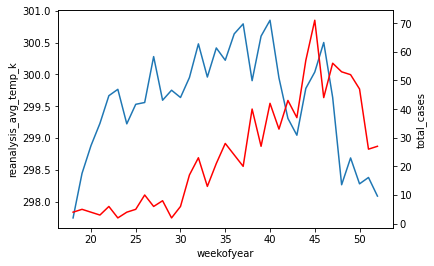

sj 1991
15


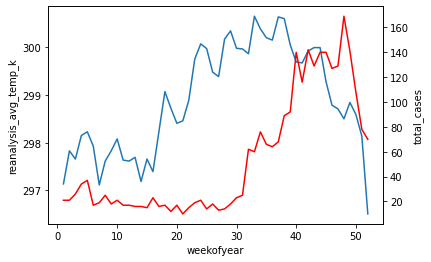

sj 1992
-26


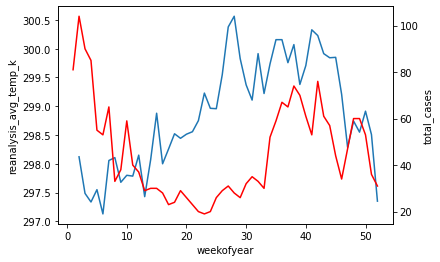

sj 1993
22


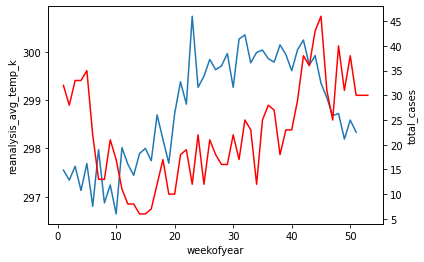

sj 1994
7


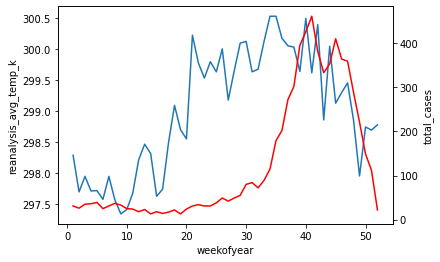

sj 1995
16


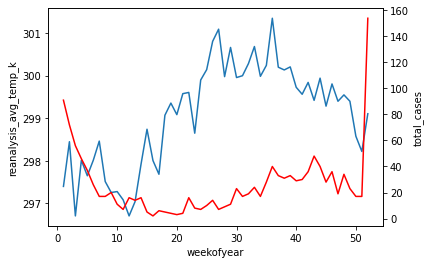

sj 1996
7


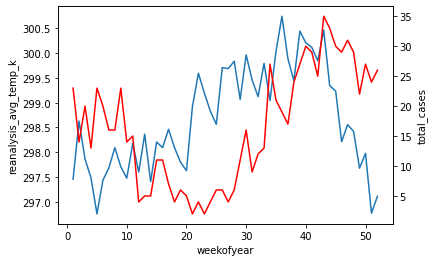

sj 1997
6


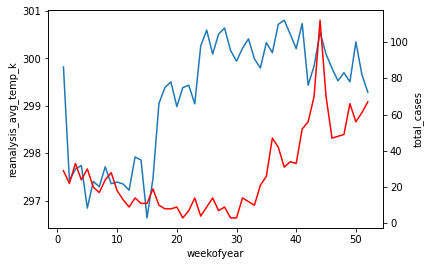

sj 1998
0


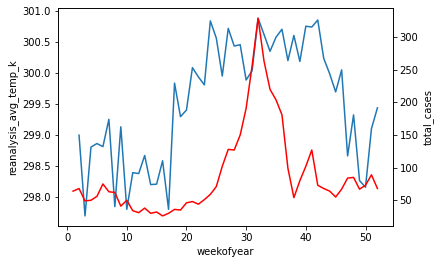

sj 1999
-35


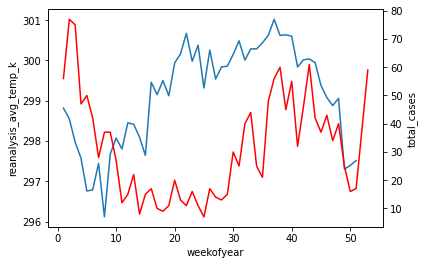

sj 2000
9


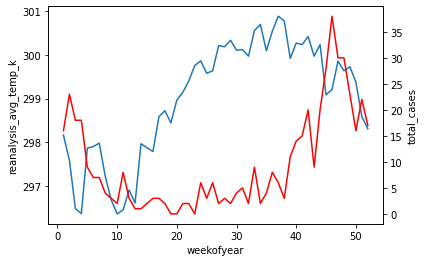

iq 2000
-10


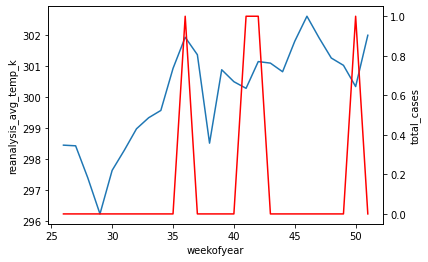

sj 2001
5


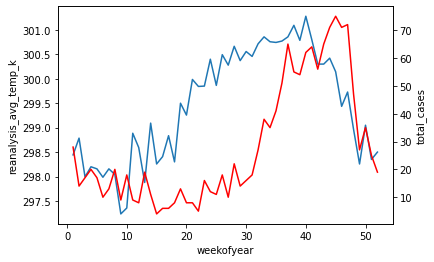

iq 2001
9


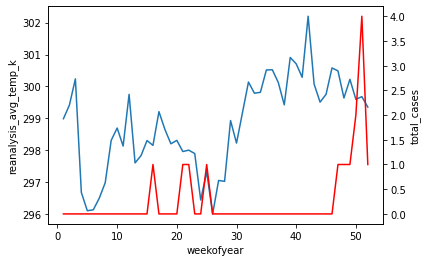

sj 2002
-35


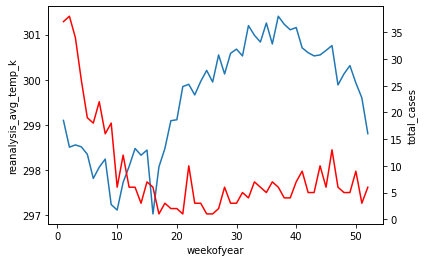

iq 2002
47


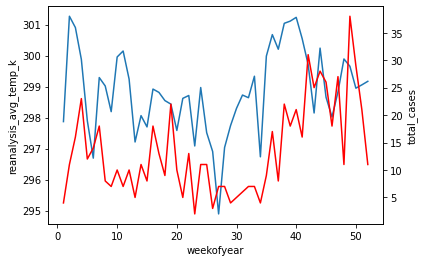

sj 2003
0


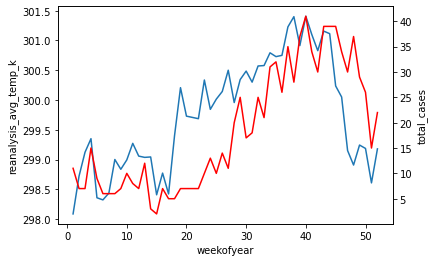

iq 2003
-43


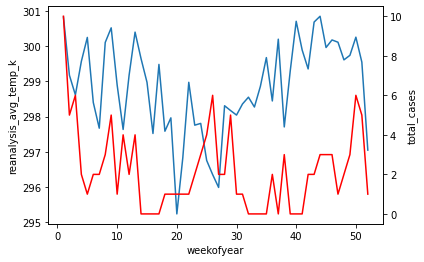

sj 2004
1


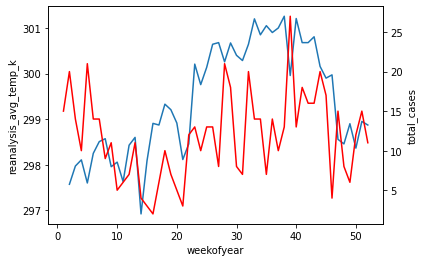

iq 2004
45


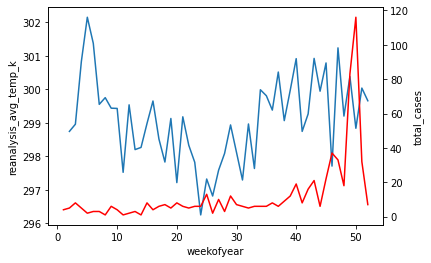

sj 2005
-2


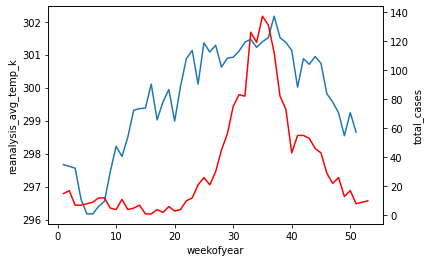

iq 2005
-25


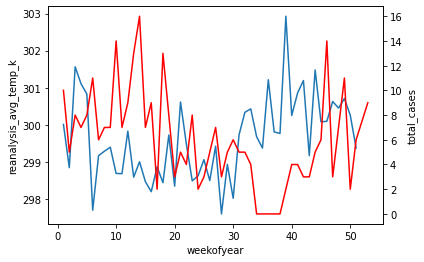

sj 2006
-2


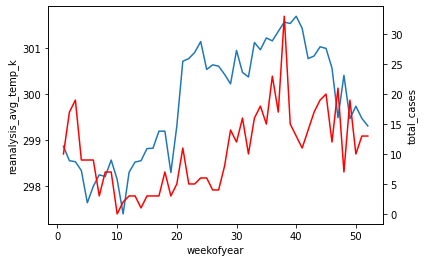

iq 2006
-39


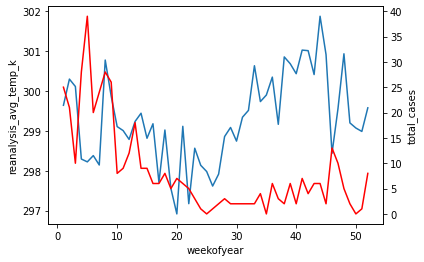

sj 2007
-2


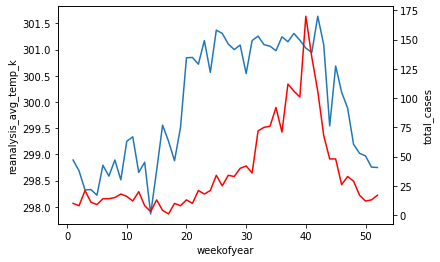

iq 2007
42


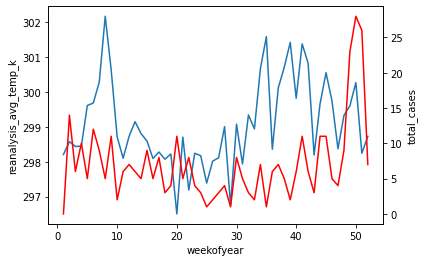

sj 2008
-16


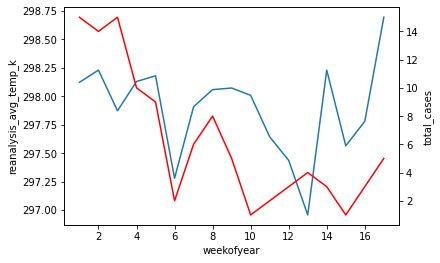

iq 2008
1


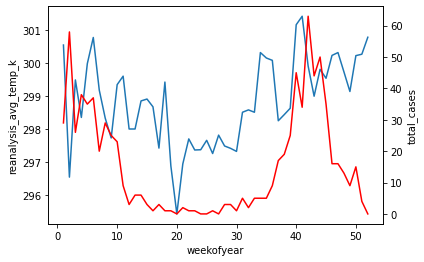

iq 2009
-41


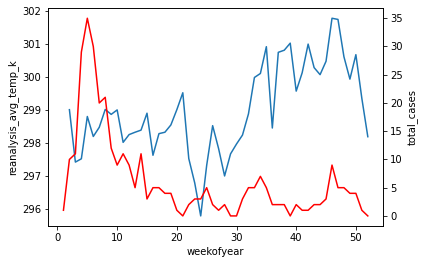

iq 2010
0


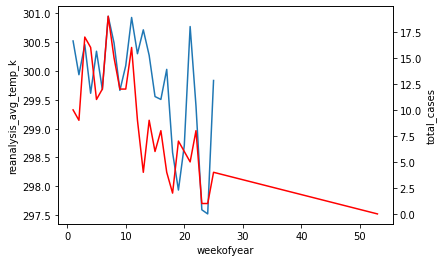

In [42]:
for year in train_df.year.unique():
    for city in ['sj', 'iq']:
        if train_df[(train_df.city == city) & (train_df.year == year)].shape[0] > 0:
            print(city, year)
            peak_w_cases = train_df[(train_df.city == city) 
                     & (train_df.year == year)
                     & (train_df.total_cases == train_df[(train_df.city == city) 
                                                         & (train_df.year == year)].total_cases.max())].weekofyear.min()
            peak_w_temp = train_df[(train_df.city == city) 
                     & (train_df.year == year)
                     & (train_df.reanalysis_avg_temp_k == train_df[(train_df.city == city) 
                                                         & (train_df.year == year)].reanalysis_avg_temp_k.max())].weekofyear.min()
            print(peak_w_cases - peak_w_temp)
            sns.lineplot(x='weekofyear', y='reanalysis_avg_temp_k', data = train_df[(train_df.city == city) 
                                                                                    & (train_df.year == year)][['weekofyear',
                                                                                                                'reanalysis_avg_temp_k', 
                                                                                                                'total_cases']])
            ax2 = plt.twinx()
            sns.lineplot(x='weekofyear', y='total_cases', data = train_df[(train_df.city == city) 
                                                                          & (train_df.year == year)][['weekofyear',
                                                                                                      'reanalysis_avg_temp_k', 
                                                                                                      'total_cases']], ax=ax2, color='r')
            plt.show()

The delay doesn't seem to be consistent but initially can be estimated between to be 5 to 10 weeks